In [21]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
import os
from os.path import isfile, join
import re
import h5py
import random
import numpy as np
import h5py

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Input, Flatten, Dense, Dropout,  Activation, Conv3D, MaxPooling3D, UpSampling3D, BatchNormalization, Activation, Reshape
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import multi_gpu_model

from keras.optimizers import SGD
from keras.layers.merge import concatenate, add

#from keras.utils.io_utils import HDF5Matrix
from keras.utils import plot_model
from keras import optimizers

import os
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from random import shuffle

In [22]:
dirmodel = '/mnt/MD1200A/lconcha/videos/Modelos/Data_augmentation/'
# cargamos la estructura de la red
with open(dirmodel + "data_augmentation.json") as json_file:
    json_config = json_file.read()
model = keras.models.model_from_json(json_config)

checkpoint_path = "/mnt/MD1200A/lconcha/videos/Modelos/Data_augmentation/training2/cp-0012.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
model.load_weights(checkpoint_path)

print("Load model to disk")

Load model to disk


In [23]:
cap = cv2.VideoCapture('/mnt/MD1200A/lconcha/videos/RAT_VIDEOS_CROPPED_RESIZE/147.2018-2-7.Rat36.mp4')
frames = []


while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        resize = cv2.resize(frame, (128,128), interpolation = cv2.INTER_AREA)
        frames.append(resize)
        
    if ret == False:
        break
        
it = 0
etiq = []

for line in frames:
    etiq.append(it)
    it+=1


groups8 = []
boolean= False
pos = 0

while boolean == False:
    
    for line in etiq:
        if line== (0 + pos) or line == (4 + pos) or line == (8 + pos) or line == (12 + pos) or line == (16 + pos) or line == (20 + pos) or line == (24 + pos) or line == (28 + pos):
            groups8.append(frames[line])
    
    
    pos += 1
    if pos == len(frames) - 32:
        boolean = True
        
sets = [] #En esta lista vamos a separar en conjuntos de 8 los frames obtenidos anteriormente
X_values = [] #En esta lista cada conjunto de 8 frames lo convertiremos en un array de shape [8 128 128]

for i in range(0, len(groups8), 8):
    sets.append(groups8[i:i+8])

for j in sets: #recorremos sets y concatenamos los 8 frames, para añadirlos a una nueva lista
    X = np.stack(j)
    X_values.append(X)
    

x_array = np.array(X_values)

prediction = model.predict(x_array)

array_prediction = np.argmax(prediction, axis=1)

In [29]:
#print(round((prediction[5967])[0]*100,2))
print(prediction[1639])

len(prediction)

[0.05105284 0.9384093 ]


3520

In [37]:
for i in (prediction[1590:1699]):
    print(round(i[1]*100,2))

51.36
50.65
68.83
67.71
63.16
61.21
74.5
65.13
47.18
37.19
42.31
39.69
36.44
31.0
31.45
27.0
26.14
19.17
29.3
29.06
28.87
32.46
39.4
46.33
38.56
46.8
54.25
56.99
60.37
65.23
64.04
60.62
64.64
68.78
65.9
72.21
74.34
91.21
85.0
80.04
87.8
91.86
87.06
83.01
91.17
90.99
91.39
91.65
92.06
93.84
88.27
92.91
91.75
94.25
86.98
87.58
86.76
88.28
85.44
84.39
87.65
92.23
82.7
77.22
77.62
95.36
89.35
87.2
84.6
91.13
87.93
86.38
74.38
78.92
79.76
80.37
75.34
56.41
48.67
9.44
16.95
21.6
16.12
43.22
39.75
20.23
12.27
23.64
25.15
9.45
9.45
5.16
11.13
6.2
4.86
7.49
2.93
2.35
2.63
13.21
1.57
1.15
1.08
22.21
0.94
1.35
1.43
12.3
0.94


In [4]:
print(x_array[0].shape)
print(array_prediction)
print(len(x_array))
print(len(array_prediction))

if 1 in array_prediction:
    print('yes')

(8, 128, 128, 3)
[0 0 0 ... 0 0 0]
3520
3520
yes


int64


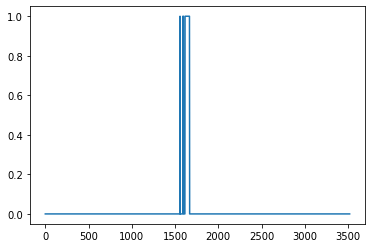

In [27]:
array_prediction

plt.plot(array_prediction)

print(array_prediction.dtype)

In [8]:
from scipy.ndimage import gaussian_filter

In [16]:
array_prediction = array_prediction.astype(np.float)

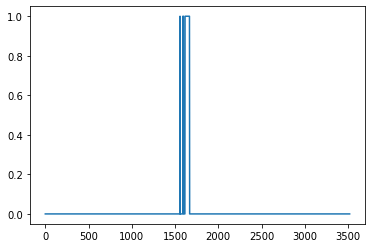

In [18]:
plt.plot(array_prediction)

[0. 0. 0. ... 0. 0. 0.]


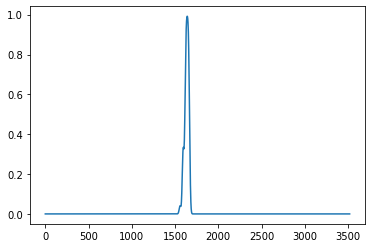

In [19]:
a = gaussian_filter(array_prediction, sigma=10)

plt.plot(a)

print(a)


In [13]:
pos_at = []

posicion = 0
for i in a:
    if i > 0.25:
        pos_at.append(posicion)
    posicion +=1

'''b = []
for i in range(32):
    b.append((pos_at[-1])+(i+1))

c_gaus = pos_at + b
c_gaus = np.array(c_gaus)
print (c_gaus)
plt.plot(c_gaus)'''

'b = []\nfor i in range(32):\n    b.append((pos_at[-1])+(i+1))\n\nc_gaus = pos_at + b\nc_gaus = np.array(c_gaus)\nprint (c_gaus)\nplt.plot(c_gaus)'

In [14]:
pos_at 

[]

[1558 1590 1591 1592 1593 1594 1595 1596 1597 1615 1616 1617 1618 1619
 1620 1621 1622 1623 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633
 1634 1635 1636 1637 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647
 1648 1649 1650 1651 1652 1653 1654 1655 1656 1657 1658 1659 1660 1661
 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671 1672 1673 1674 1675
 1676 1677 1678 1679 1680 1681 1682 1683 1684 1685 1686 1687 1688 1689
 1690 1691 1692 1693 1694 1695 1696 1697 1698 1699]


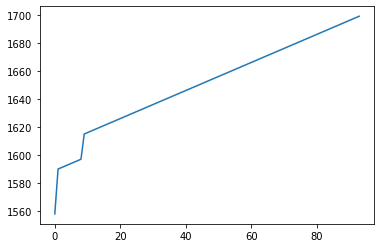

In [28]:
pos_at = []

posicion = 0
for i in array_prediction:
    if i == 1:
        pos_at.append(posicion)
    posicion +=1

b = []
for i in range(32):
    b.append((pos_at[-1])+(i+1))

c = pos_at + b
c = np.array(c)
print (c)
plt.plot(c)

In [79]:
video_label = cv2.VideoWriter("/mnt/MD1200A/lconcha/videos/outvideo2.mp4", cv2.VideoWriter_fourcc(*"XVID"),20.0,(720,720))

cap = cv2.VideoCapture("/mnt/MD1200A/lconcha/videos/RAT_VIDEOS_CROPPED_RESIZE/2.2017-11-10.Rat12.mp4")

it = 0
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if it in c_gaus:
            resize = cv2.resize(frame, (720,720), interpolation = cv2.INTER_AREA)
            text = cv2.putText(resize, "Estado: Ataque", (10,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
            video_label.write(text)
        else:
            resize = cv2.resize(frame, (720,720), interpolation = cv2.INTER_AREA)
            text = cv2.putText(resize, "Estado: Reposo", (10,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
            video_label.write(text)
        
        it +=1
    if ret == False:
        break
        
video_label.release()

In [96]:
video_label = cv2.VideoWriter("/mnt/MD1200A/lconcha/videos/prueba.mp4", cv2.VideoWriter_fourcc(*"XVID"),20.0,(720,720))

cap = cv2.VideoCapture("/mnt/MD1200A/lconcha/videos/RAT_VIDEOS_CROPPED_RESIZE/2.2017-11-10.Rat12.mp4")

it = 0
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        
        if it == len(prediction):
            it -=1
            
        if it in c_gaus:
            resize = cv2.resize(frame, (720,720), interpolation = cv2.INTER_AREA)
            text = cv2.putText(resize, "Estado: Ataque" + ' ' + str(round((prediction[it])[1]*100,2)) +'%', (10,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
            video_label.write(text)
        else:
            resize = cv2.resize(frame, (720,720), interpolation = cv2.INTER_AREA)
            text = cv2.putText(resize, "Estado: Reposo" + ' ' + str(round((prediction[it])[0]*100,2))+'%', (10,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
            video_label.write(text)
            
            
        it +=1
    if ret == False:
        break
        
video_label.release()